本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


<ipython-input-1-8e50bf18b56c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['ratio'][i+1]=np.log(data_['close'][i+1]/data_['close'][i])
<ipython-input-1-8e50bf18b56c>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['fore_price']=data_test['close']#预测的股价
<ipython-input-1-8e50bf18b56c>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['fore_price'][

    close     ratio        date
60  12.86  0.013307  2018-08-09
61  12.94  0.006202  2018-08-10
62  13.02  0.006163  2018-08-13
63  12.73 -0.022525  2018-08-14
64  12.69 -0.003147  2018-08-15
65  12.51 -0.014286  2018-08-16
66  12.20 -0.025092  2018-08-17
67  11.54 -0.055617  2018-08-20
68  11.52 -0.001735  2018-08-21
69  11.38 -0.012227  2018-08-22
70  11.45  0.006132  2018-08-23
71  11.43 -0.001748  2018-08-24
72  11.61  0.015625  2018-08-27
73  11.49 -0.010390  2018-08-28
74  11.30 -0.016674  2018-08-29
75  11.01 -0.025999  2018-08-30
76  10.78 -0.021111  2018-08-31
77  11.07  0.026546  2018-09-03
78  11.00 -0.006343  2018-09-04
79  11.02  0.001817  2018-09-05
80  10.85 -0.015547  2018-09-06
81  10.79 -0.005545  2018-09-07
82  10.35 -0.041633  2018-09-10
83  10.80  0.042560  2018-09-11
84  10.50 -0.028171  2018-09-12
85  10.75  0.023530  2018-09-13
86  11.22  0.042792  2018-09-14
87  10.81 -0.037226  2018-09-17
88  10.80 -0.000925  2018-09-18
10.8


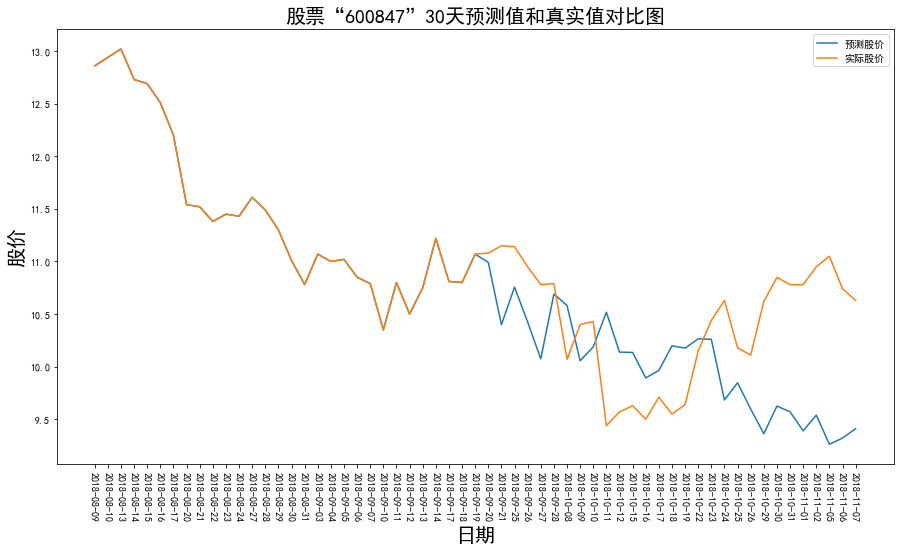

In [1]:
import os
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['simhei']#用于正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用于正常显示负号
import tushare as ts
import pandas as pd
import numpy as np

#获取股票数据
ts_code='600847'
data_=ts.get_hist_data(ts_code)#获得数据
#,start='2020-01-01',end='2020-11-10'
data_=pd.DataFrame(data_[['close']])#获得其中的收盘价
data_.sort_index(inplace=True)#按照日期做升序处理
data_['ratio']=[0.0000000000000000000]*len(data_)
data_['date']=data_.index
data_.index=range(data_.shape[0])

#计算股价比率
for i in range(data_.shape[0]-1):
    data_['ratio'][i+1]=np.log(data_['close'][i+1]/data_['close'][i])

#计算基础参数
T=30#周期为30天（一个月）
k=3#第一个周期
data_train=data_.iloc[(k-1)*T:(k*T-1),:]#选取过去一月的时间作为训练集
data_test=data_.iloc[(k-1)*T:(k+1)*T-1,:]##选取过去第二月的时间作为测试集

mean=data_train['ratio'].sum()/T#计算样本均值
S_2=((data_train['ratio']-mean)**2).sum()/(T-1)#计算样本方差
miu=(mean+S_2/2)/1#股价漂移率
sigma=np.sqrt(S_2)#股价波动率
print(data_train)
# #通过几何布朗运动模型预测未来周期股价
S_0=list(data_train['close'])[-1]#初始股价
print(S_0)
data_test['fore_price']=data_test['close']#预测的股价
for t in range(1,data_train.shape[0]+1):
    Bt = np.random.normal(0, 1,t)[0]#布朗运动随机数值
    data_test['fore_price'][t+k*T-1]=S_0*np.exp(sigma*Bt+(miu-S_2/2)*t)#预测股价
data_test['fore_price']

# #画出预测值和真实值对比图
plt.figure(num=k,figsize=(15,8))
plt.plot(data_test['date'],data_test['fore_price'],label='预测股价')
plt.plot(data_test['date'],data_test['close'],label='实际股价')
plt.xlabel('日期',fontsize=20)
plt.ylabel('股价',fontsize=20)
plt.title("股票“"+ts_code+"”"+str(T)+'天预测值和真实值对比图',fontsize=20)
plt.legend(loc='upper right')
plt.xticks(rotation=270);

